# Librerías —ฅ/ᐠ. ̫ .ᐟ\ฅ —
---

In [1]:
%matplotlib widget
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.animation as anim
from scipy.integrate import odeint
from scipy.sparse.linalg import eigsh

## Punto 1.
---

## a.
### Def. Variables:

In [2]:
t = np.linspace(0,20,10000)
h = t[1] - t[0]
r0 = [0.+h,0.+h]

### Def. Funciones:

In [3]:
def System(r,t):
    x=r[0]
    y=r[1]
    
    dx=2*x-y
    dy=x+2*y
    
    return np.array([dx,dy])

def IntegratorAdams(f,r0,t):
    x = np.zeros_like(t)
    vx = np.zeros_like(t)
    
    x[0] = r0[0]
    vx[0] = r0[1]
    
    K11 = np.zeros(2)
    K12 = np.zeros(2)
    
    present = np.array([x[0],vx[0]])
    K11 = f(present,t[0])
    
    # Euler
    x[1] = x[0] + h*K11[0]
    vx[1] = vx[0] + h*K11[1]
    
    xc = x.copy()
    vxc = vx.copy()
    
    for i in range(2,len(t)):
        
        present = np.array([x[i-1],vx[i-1]])
        past = np.array([x[i-2],vx[i-2]])
        
        K11 = f(present,t[i-1])
        K12 = f(past,t[i-2])
        
        x[i] = x[i-1] + 0.5*h*(3*K11[0]-K12[0])
        vx[i] = vx[i-1] + 0.5*h*(3*K11[1]-K12[1])
        
        xc[i] = x[i]
        vxc[i] = vx[i]
        
        # Futuro
        futuro = np.array([x[i],vx[i]])
        K13 = f(futuro,t[i])
        
        xc[i] = xc[i-1] + h*(5*K13[0]+8*K11[0]-K12[0])/12
        vxc[i] = vxc[i-1] + h*(5*K13[1]+8*K11[1]-K12[1])/12
    
    return x,vx,xc,vxc

### Sol. :

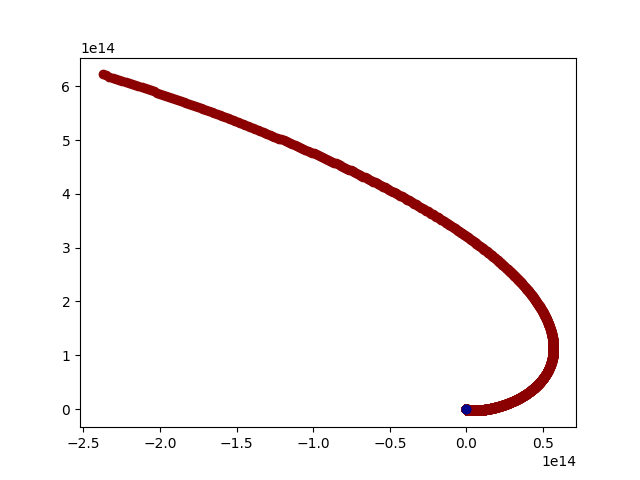

In [4]:
sol = IntegratorAdams(System,r0,t)
sol_t = odeint(System,r0,t)

plt.scatter(sol[0],sol[1],color='darkred')
plt.scatter(sol_t[0],sol_t[1],color='darkblue')

## b.

In [5]:
Matriz_est=np.array([[2,-1],[1,2]])
print("Matriz de estabilidad:\n",Matriz_est)

Matriz de estabilidad:
 [[ 2 -1]
 [ 1  2]]


## c.

In [6]:


w,v= eigsh(Matriz_est,k=len(Matriz_est),which='LM')
eigen_val=w
eigen_vec=v

print("Sus valores propios son:\n",eigen_val)
print("Sus vectores propios son:\n",eigen_vec)

Sus valores propios son:
 [1. 3.]
Sus vectores propios son:
 [[-0.70710678  0.70710678]
 [ 0.70710678  0.70710678]]


C:\Users\Usuario\AppData\Roaming\Python\Python39\site-packages\scipy\sparse\linalg\_eigen\arpack\arpack.py:1592: RuntimeWarning: k >= N for N * N square matrix. Attempting to use scipy.linalg.eigh instead.
  warnings.warn("k >= N for N * N square matrix. "


## d.

Text(0.005, 0.005, 'Punto crítico: (0.0).')

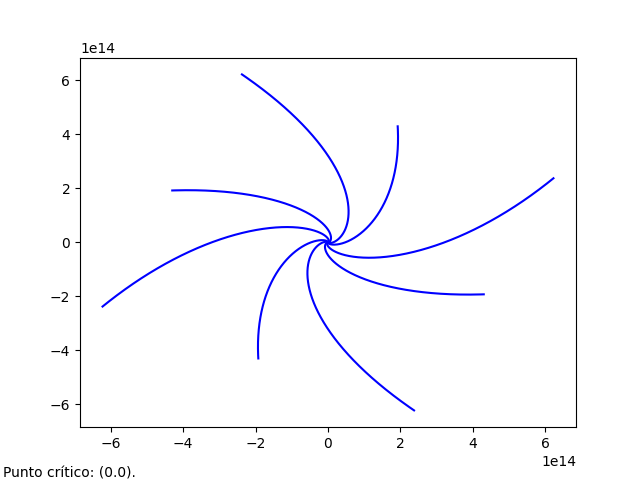

In [7]:
x=np.arange(1,1000)
y=np.arange(1,1000)
X,Y = np.meshgrid(x,y)
r=[(0+h,0),(0-h,0),(0,0+h),(0,0-h),(0+h,0+h),(0-h,0-h),(0-h,0+h),(0+h,0-h)]


fig=plt.figure()
ax=fig.add_subplot()

for i in r:
    sol2=IntegratorAdams(System,i,t)
    ax.plot(sol2[0],sol2[1],c="b")

ax.quiver(X,Y,System([X,Y],t)[0],System([X,Y],t)[1])
fig.text(.005,.005,"Punto crítico: (0.0).")

## Punto 3.
---

### Def. Variables:

In [8]:
y0=np.array([0.,0.,np.pi/4,0.])
t2=np.linspace(0.,8.,10000)

g=9.81
m=0.1
r=0.1
d=0.3

### Def. Funciones:

In [9]:
def System (y0,t,r,d,m,dpsi=400):
    
    theta_0=np.pi/4
    phi=y0[0]
    psi=y0[1]
    theta=y0[2]
    dtheta=y0[3]
    
    I_0=(1/4)*m*r**2 +m*d**2
    I_z=(1/2)*m*r**2
    
    dpsi=dpsi
    dtheta=dtheta
    
    dphi=(I_z*dpsi*(np.cos(theta_0)-np.cos(theta)))/(
        I_0*np.sin(theta)**2 + I_z*np.cos(theta)**2)

    
    ddtheta= (dphi**2*np.sin(theta)*np.cos(theta)*(I_0-I_z)
              -dphi*dpsi*I_z*np.sin(theta) +m*g*d*np.sin(theta))/I_0
    

    return [dpsi,dphi,dtheta,ddtheta]
    

### Sol. :

### a.

### b.
Sea el disco que gira por un eje que pasa por el centro y es perpendicular a su plano.Luego, por medio de integración se tiene que:
$$
\begin{align*}
I=\int r^2 \,dm:dm\text{ es el diferencial de masa.}
\end {align*}
$$

Nótese que el diferencial de masa es expresable en términos de un diferencial de radio. Para hacerlo haremos uso de la fórmula de densidad. Entonces,

$$
\begin{align*}
\rho =\frac{dm}{dA}:da=2\pi rdr\implies dm=\frac{m2\pi r dr}{\pi R^2}=\frac{m2 r dr}{R^2}.
\end {align*}
$$


Al meter esta expresión en la integral, se llega a que:

$$
\begin{align*}
    &I=\int r^2 \,\frac{m2 r }{R^2}dr=\frac{2 m }{R^2}\int_{0}^{R} r^3 \,dr=\frac{2mr^4}{R^2}\Big |_0^R=\frac{mR^4}{2R^2}-\frac{mO^4}{2R^2}=\frac{mR^2}{2}.\\
\end {align*}
$$

### c.

Nótese que el lagrangiano del sistema esta dado por:

\begin{equation*}
L=\frac{1}{2} I_0 (\dot{\theta}^2 + \dot{\phi}^2 \sin^2{\theta}) + \frac{1}{2} I_z  (\dot{\phi} \cos{\theta} + \dot{\psi})^2 -mgd\cos{\theta}.
\end{equation*}


A su vez, por Eluer-Lagrange, conocemos que:

\begin{equation*}
\frac{d}{dt}\bigg(\frac{\partial L}{\partial \dot{q_i}}\bigg) = \frac{\partial L}{\partial {q_i}}.
\end{equation*}


Luego,

\begin{equation*}
\frac{d}{dt}\bigg(\frac{\partial L}{\partial \dot{\phi}}\bigg)= \frac{\partial L}{\partial {\phi}}.
\end{equation*}

Nótese que $L$ es independiente a $\phi$. Por tanto,

\begin{equation*}
\frac{d}{dt}\bigg(\frac{\partial L}{\partial \dot{\phi}}\bigg)= 0\implies\frac{\partial L}{\partial \dot{\phi}}=p_\phi =c,
\end{equation*}

\begin{equation*}
\frac{\partial L}{\partial \dot{\phi}}= I_0 \dot{\phi} \sin^2{\theta} + I_z (\dot{\phi} \cos{\theta} +\dot{\psi}) \cos{\theta}=\dot{\phi} ( I_0 \sin^2{\theta} + I_z \cos^2{\theta}) + I_z \dot{\psi} \cos{\theta}=p_\phi
\end{equation*}

Ahora podemos realizarlo similar para $\dot{\psi}$, tal que:

$$
\frac{\partial L}{\partial \dot{\psi}}=p_\psi=I_z (\dot{\phi} \cos{\theta} + \dot{\psi})=c.
$$


A su vez, para $\theta$ se tiene que:
\begin{equation*}
\frac{d}{dt}\bigg(\frac{\partial L}{\partial \dot{\theta}}\bigg) = \frac{\partial L}{\partial {\theta}}
\end{equation*}

$$
\frac{\partial L}{\partial {\theta}}=  I_0 \dot{\phi}^2 \sin{\theta} \cos{\theta} - I_z (\dot{\phi} \cos{\theta} +\dot{\psi}) -\sin{\theta} + mgd\sin{\theta} = \dot{\phi}^2 \sin{\theta} \cos{\theta} (I_0 -I_z) -I_z \dot{\phi} \dot{\psi} \sin{\theta}  + mgd\sin{\theta},
$$

$$
\frac{\partial L}{\partial \dot{\theta}}=I_0\dot{\theta},
$$

$$
\frac{d}{dt}\bigg(\frac{\partial L}{\partial \dot{\theta}}\bigg) = I_0 \ddot{\theta}.
$$


$\therefore$

$$
I_0 \ddot{\theta}=  \dot{\phi}^2 \sin{\theta} \cos{\theta} (I_0 -I_z) -I_z \dot{\phi} \dot{\psi} \sin{\theta}  + mgd\sin{\theta}.
$$

 

### e.

In [10]:
sol=odeint(System,y0,t2,args=(r,d,m))

dpsi=sol[:,0]
dphi=sol[:,1]
dtheta=sol[:,2]
ddtheta=sol[:,3]

dpsi

array([0.00000000e+00, 3.20032003e-01, 6.40064006e-01, ...,
       3.19935994e+03, 3.19967997e+03, 3.20000000e+03])

Text(0.5, 1.0, ' Gráfica $\\dot \\omega$ vs t')

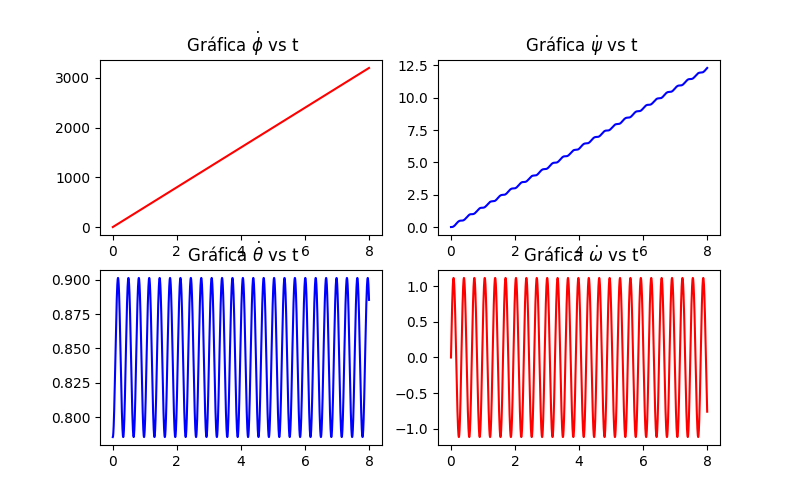

In [11]:
fig=plt.figure(figsize=(8,5))
ax=fig.add_subplot(221)
ax1=fig.add_subplot(222)
ax2=fig.add_subplot(223)
ax3=fig.add_subplot(224)



ax.plot(t2,dpsi,color="red")
ax1.plot(t2,dphi,color="blue")
ax2.plot(t2,dtheta,color="blue")
ax3.plot(t2,ddtheta,color="red")

ax.set_title(' Gráfica $\dot \phi$ vs t ')
ax1.set_title(' Gráfica $\dot \psi$ vs t')
ax2.set_title(' Gráfica $\dot θ $ vs t')
ax3.set_title(' Gráfica $\dot \omega$ vs t')

### f.

In [12]:
position=np.zeros([len(t),3])
for i in range(len(t)):
    position[i,0]=d*np.cos(dphi[i])*np.sin(dtheta[i])
    position[i,1]=d*np.sin(dphi[i])*np.sin(dtheta[i])
    position[i,2]=d*np.cos(dtheta[i]) 


scale=20
t1 = t[::scale]

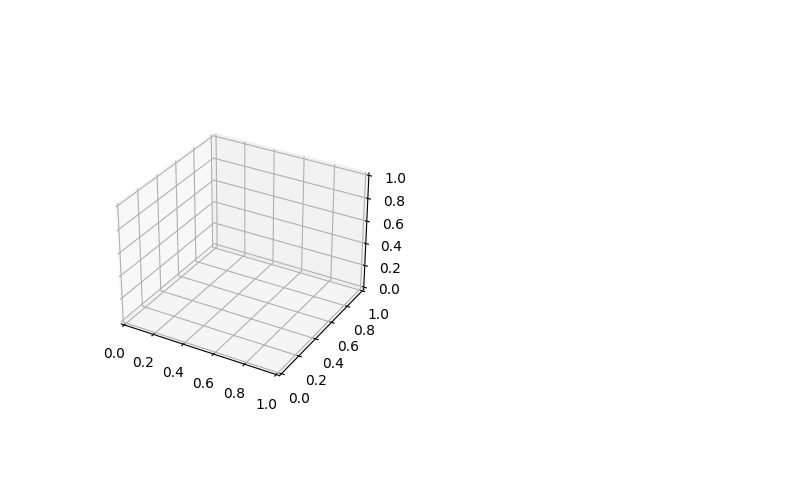

In [13]:
fig3 = plt.figure(figsize=(8,5))
ax3 = fig3.add_subplot(121,projection='3d')

def init():
    ax.clear()
    ax.set_xlim(-0.2,0.2)
    ax.set_ylim(-0.2,0.2)
    ax.set_zlim(-0.2,0.2)
    
def Update(i):
    init()

    x=position[::scale][i,0]
    y=position[::scale][i,1]
    z=position[::scale][i,2]
        
        
    ax3.scatter(x,y,z)
    ax3.plot([0,x], [0,y],[0,z], 'o-', lw=2,c="b")
    
Animation = anim.FuncAnimation(fig3,Update,frames=len(t1),init_func=init)